###   Data Preparation

As a data scientist for BestDeal retailer, you
have been tasked with improving their revenue and the effectiveness of the
marketing campaign of their electronic products. The given dataset has
10,000 records for the purchases of their customers and is used to predict
customers shopping patterns and to provide answers for ad-hoc queries.
The dataset DirtyData4BestDeal10000.csv is drawn from its database of
customers.

In [2]:
import pandas as pd  # panda's nickname is pd

import numpy as np  # numpy as np

from pandas import DataFrame, Series     # for convenience

import sqlalchemy

from sqlalchemy import create_engine

from sqlalchemy import inspect

### Lets ead the dirtydata4bestdeal CSV and load into a dataframe object

In [5]:
dirtydata4bestdeal=pd.read_csv('DirtyData4BestDeal10000.csv')

In [3]:

# Do you see NaN values below?

dirtydata4bestdeal.head()

,ZipCode,CustomerAge,SamsungTV46LED,SonyTV42LED,XBOX360,DellLaptop,BoseSoundSystem,BoseHeadSet,SonyHeadSet,iPod,...,GalaxyTablet,SurfaceTablet,HPLaptop,HDMICable,SpeakerCable,CallOfDutyGame,GrandTheftAutoGame,ASUSLaptop,LenevoLaptop,TVStandWallMount
0,30134.0,35.0,1,1,1,0,0,1.0,1.0,0.0,...,1,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1
1,62791.0,43.0,0,1,0,0,1,0.0,1.0,0.0,...,1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1
2,60611.0,23.0,1,NaN,0,1,0,NaN,1.0,1.0,...,0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,1.0,1
3,60616.0,56.0,0,1,1,1,0,0.0,1.0,1.0,...,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0
4,30303.0,25.0,1,NaN,0,NaN,1,1.0,1.0,0.0,...,1,0.0,1.0,1.0,1.0,1.0,0.0,1.0,10.0,0


### Lets use boxplot to visualize the data and get an idea if there are dirty/messy/invalid data

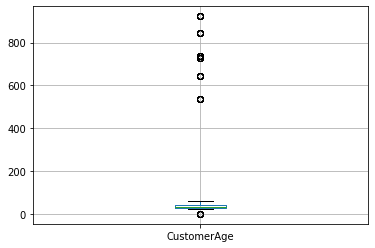

In [4]:
dirtydata4bestdeal.boxplot(column='CustomerAge')


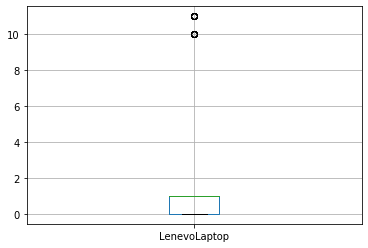

In [5]:
dirtydata4bestdeal.boxplot(column='LenevoLaptop')

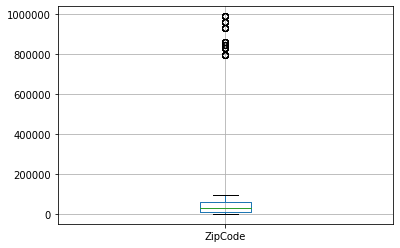

In [6]:
dirtydata4bestdeal.boxplot(column='ZipCode')


### Lets clean the dirty/messy data in the dirtydata4bestdeal dataframe object

In [6]:
# Drop the NaN values 

cleandata4bestdeal=dirtydata4bestdeal.dropna()
cleandata4bestdeal.head()

# Do you see NaN values dropped below?


,ZipCode,CustomerAge,SamsungTV46LED,SonyTV42LED,XBOX360,DellLaptop,BoseSoundSystem,BoseHeadSet,SonyHeadSet,iPod,...,GalaxyTablet,SurfaceTablet,HPLaptop,HDMICable,SpeakerCable,CallOfDutyGame,GrandTheftAutoGame,ASUSLaptop,LenevoLaptop,TVStandWallMount
0,30134.0,35.0,1,1,1,0,0,1.0,1.0,0.0,...,1,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1
1,62791.0,43.0,0,1,0,0,1,0.0,1.0,0.0,...,1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1
3,60616.0,56.0,0,1,1,1,0,0.0,1.0,1.0,...,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0
5,2108.0,55.0,1,1,1,1,10,0.0,0.0,0.0,...,1,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0
6,90033.0,44.0,1,1,1,1,0,0.0,0.0,0.0,...,1,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1


In [8]:


# Add the rest of your code here to clean the data



## I would perform the below on the code base
### I am not sure I should be removing/manipulating data from the data set but along with outliers, I would also begin to edit or remove values where identifiers are not equal to 1 or 0 and ages look incorrect

In [9]:
# objects = ['SamsungTV46LED' , 'SonyTV42LED', 'XBOX360', 'DellLaptop', 'BoseSoundSystem']

# for i in objects:
#     cleandata4bestdeal[i] = pd.to_numeric(cleandata4bestdeal[i], downcast='float', errors='coerce')
    
# cleandata4bestdeal.dtypes

In [10]:
# Add the rest of your code here to clean the data

# Remove duplicates
# cleandata4bestdeal = cleandata4bestdeal.drop_duplicates()
# cleandata4bestdeal = cleandata4bestdeal.dropna()
# print(cleandata4bestdeal.duplicated().sum())
# print(cleandata4bestdeal.isna().sum())

In [11]:
# experimenting with how to identify rows that have outliers greater than sigma * 1.5 or 3. The below is supposed to only return values that are less than 3 (extreme outliers)
# Need to explore in more detail

# from scipy import stats
# cleandata4bestdeal[(np.abs(stats.zscore(cleandata4bestdeal)) < 3).all(axis=1)]

### Lets store the cleaned data into the Database

In [7]:
engine=create_engine('sqlite:///bestdeal.db')

In [8]:
try:
    cleandata4bestdeal.to_sql('trans4cust', engine)
except ValueError:
    print('Table Already Exists')

Table Already Exists


In [9]:
pd.read_sql_table('trans4cust',engine).columns

Index(['index', 'ZipCode', 'CustomerAge', 'SamsungTV46LED', 'SonyTV42LED',
       'XBOX360', 'DellLaptop', 'BoseSoundSystem', 'BoseHeadSet',
       'SonyHeadSet', 'iPod', 'iPhone', 'Panasonic50LED', 'SonyPS4', 'WiiU',
       'WDexternalHD', 'SamsungTV55LED', 'SonyTV60LED', 'SandiskMemoryCard',
       'SonySoundSystem', 'SonyCamera', 'PanasonicCamera', 'HPPrinter',
       'SonyDVDplayer', 'ToshibaDVDplayer', 'GalaxyTablet', 'SurfaceTablet',
       'HPLaptop', 'HDMICable', 'SpeakerCable', 'CallOfDutyGame',
       'GrandTheftAutoGame', 'ASUSLaptop', 'LenevoLaptop', 'TVStandWallMount'],
      dtype='object')

** Sanity Test: Did it create the table in bestdeal.db?  Check!!**

In [14]:
insp=inspect(engine)

In [15]:
 insp.get_table_names()

['trans4cust', 'trans4cust_2']

In [16]:
pd.read_sql_table('trans4cust', engine).columns

Index(['index', 'ZipCode', 'CustomerAge', 'SamsungTV46LED', 'SonyTV42LED',
       'XBOX360', 'DellLaptop', 'BoseSoundSystem', 'BoseHeadSet',
       'SonyHeadSet', 'iPod', 'iPhone', 'Panasonic50LED', 'SonyPS4', 'WiiU',
       'WDexternalHD', 'SamsungTV55LED', 'SonyTV60LED', 'SandiskMemoryCard',
       'SonySoundSystem', 'SonyCamera', 'PanasonicCamera', 'HPPrinter',
       'SonyDVDplayer', 'ToshibaDVDplayer', 'GalaxyTablet', 'SurfaceTablet',
       'HPLaptop', 'HDMICable', 'SpeakerCable', 'CallOfDutyGame',
       'GrandTheftAutoGame', 'ASUSLaptop', 'LenevoLaptop', 'TVStandWallMount'],
      dtype='object')

### Now we are ready to query the Database

#### Query example #1: get the transactions for the customers in zipCode 60616

In [17]:
resultsForBestDealCustTrans=pd.read_sql_query("SELECT * FROM trans4cust WHERE ZipCode='60616'", engine)

In [18]:
resultsForBestDealCustTrans.head()

,index,ZipCode,CustomerAge,SamsungTV46LED,SonyTV42LED,XBOX360,DellLaptop,BoseSoundSystem,BoseHeadSet,SonyHeadSet,...,GalaxyTablet,SurfaceTablet,HPLaptop,HDMICable,SpeakerCable,CallOfDutyGame,GrandTheftAutoGame,ASUSLaptop,LenevoLaptop,TVStandWallMount
0,3,60616.0,56.0,0,1,1,1,0,0.0,1.0,...,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0
1,16,60616.0,43.0,0,1,1,0,1,0.0,1.0,...,1,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1
2,18,60616.0,54.0,1,0,0,1,0,1.0,1.0,...,0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1
3,23,60616.0,43.0,1,1,1,0,1,1.0,1.0,...,1,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1
4,34,60616.0,31.0,0,1,1,1,0,0.0,1.0,...,1,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1


#### Query example #2: get the transactions for ALL customers

In [19]:
resultsForBestDealCustTrans=pd.read_sql_query("SELECT * FROM trans4cust", engine)

In [20]:
resultsForBestDealCustTrans.head()

,index,ZipCode,CustomerAge,SamsungTV46LED,SonyTV42LED,XBOX360,DellLaptop,BoseSoundSystem,BoseHeadSet,SonyHeadSet,...,GalaxyTablet,SurfaceTablet,HPLaptop,HDMICable,SpeakerCable,CallOfDutyGame,GrandTheftAutoGame,ASUSLaptop,LenevoLaptop,TVStandWallMount
0,0,30134.0,35.0,1,1,1,0,0,1.0,1.0,...,1,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1
1,1,62791.0,43.0,0,1,0,0,1,0.0,1.0,...,1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1
2,3,60616.0,56.0,0,1,1,1,0,0.0,1.0,...,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0
3,5,2108.0,55.0,1,1,1,1,10,0.0,0.0,...,1,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0
4,6,90033.0,44.0,1,1,1,1,0,0.0,0.0,...,1,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1


#### Query example #3: get the number of customers in every ZipCode sorted by ZipCode

In [21]:
resultsForBestDealCustTrans=pd.read_sql_query("SELECT ZipCode , COUNT(*) as 'num_customers' FROM trans4cust GROUP BY ZipCode  ORDER BY ZipCode", engine)

In [22]:
resultsForBestDealCustTrans

,ZipCode,num_customers
0,2108.0,632
1,2109.0,955
2,2110.0,224
3,10065.0,788
4,30134.0,1173
5,30303.0,1001
6,33129.0,554
7,33130.0,280
8,44114.0,526
9,60532.0,243


#### Query example #4: get the number of customers for  every Age Group in ZipCode 60616 sorted by CustomerAge

In [23]:
resultsForBestDealCustTrans=pd.read_sql_query(
"SELECT CustomerAge , COUNT(*) as 'num_customers' FROM trans4cust WHERE ZipCode=60616 GROUP BY CustomerAge  ORDER BY CustomerAge", engine)

In [24]:
resultsForBestDealCustTrans

,CustomerAge,num_customers
0,21.0,56
1,22.0,32
2,23.0,40
3,25.0,88
4,26.0,48
5,27.0,32
6,28.0,32
7,29.0,56
8,31.0,16
9,32.0,16


#### Query example #5: Plot in a stacked-bar figure the number of customers who bought SonyTV60LED and/or BoseSoundSystem in  every zipcode that has more than 400 customers who bought these two products(either bought one of these products or the two products)

In [25]:
SonyTV60LEDCustTrans=pd.read_sql_query(
"SELECT ZipCode , COUNT(*) as 'num_customers' FROM trans4cust WHERE SonyTV60LED=1  GROUP BY ZipCode HAVING COUNT(*) > 400", engine)

BoseSoundSystemCustTrans=pd.read_sql_query(
"SELECT ZipCode , COUNT(*) as 'num_customers' FROM trans4cust WHERE BoseSoundSystem=1 GROUP BY ZipCode HAVING COUNT(*) > 400", engine)

In [26]:
SonyTV60LEDCustTrans

,ZipCode,num_customers
0,2108.0,416
1,2109.0,611
2,10065.0,467
3,30134.0,774
4,30303.0,524
5,60616.0,697


In [27]:
BoseSoundSystemCustTrans

,ZipCode,num_customers
0,2109.0,436
1,30134.0,832
2,30303.0,472
3,60616.0,467
4,90033.0,406


In [28]:
SonyTV60LEDCustTrans.ZipCode


0     2108.0
1     2109.0
2    10065.0
3    30134.0
4    30303.0
5    60616.0
Name: ZipCode, dtype: float64

In [29]:
import numpy

#   There are zipcodes that Sony got bought but not Bose 
#   but there are also zipcodes that Bose got bought but not Sony
#
#   AND we need to use stacked-bar graph and we have a potentially asymmetrical set  of zipcode values
#   So, we need to do somework to create the symmteric set of zipcode values for Sony and Bose


sonyZipCodeTuples=tuple(SonyTV60LEDCustTrans.ZipCode.astype(numpy.int))
sony_num_customersTuples=tuple(SonyTV60LEDCustTrans.num_customers.astype(numpy.int))

boseZipCodeTuples=tuple(BoseSoundSystemCustTrans.ZipCode.astype(numpy.int))
bose_num_customersTuples=tuple(BoseSoundSystemCustTrans.num_customers.astype(numpy.int))




sony_dict = dict(zip(sonyZipCodeTuples, sony_num_customersTuples))
bose_dict = dict(zip(boseZipCodeTuples, bose_num_customersTuples))

for key in bose_dict.keys():
    if ((key in sony_dict.keys()) == False): sony_dict[key]=0

        
for key in sony_dict.keys():
    if ((key in bose_dict.keys()) == False): bose_dict[key]=0


        
bose_zip= sorted(bose_dict.keys())

sony_zip= sorted(sony_dict.keys())

bose_zip_tuple=tuple(bose_zip)

sony_zip_tuple=tuple(sony_zip)

bose_customer_list=[]

for bose in bose_zip_tuple:
    bose_customer_list.append(bose_dict[bose])

sony_customer_list=[]

for sony in sony_zip_tuple:
    sony_customer_list.append(sony_dict[sony])

bose_customer_tuple=tuple(bose_customer_list)
sony_customer_tuple=tuple(sony_customer_list)


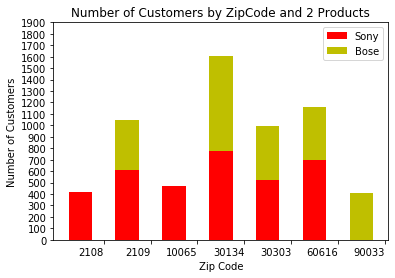

In [30]:
# See docs for bar_stack at the URL
# http://matplotlib.org/examples/pylab_examples/bar_stacked.html

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 


ind = np.arange(len(sony_customer_tuple))    


# the width of the bars: can also be len(x) sequence
width = .5


p1 = plt.bar(ind, sony_customer_tuple, width,  color='r')
p2 = plt.bar(ind, bose_customer_tuple, width, color='y', bottom=sony_customer_tuple)


plt.ylabel('Number of Customers')
plt.xlabel('Zip Code')

plt.title('Number of Customers by ZipCode and 2 Products')

plt.xticks(ind + width, sony_zip_tuple, horizontalalignment='right')

plt.yticks(np.arange(0, 2000, 100))
plt.legend((p1[0], p2[0]), ('Sony', 'Bose'))

plt.show()

In [31]:
np.arange(len(sony_customer_tuple))

array([0, 1, 2, 3, 4, 5, 6])

# Requirements :
1. (Use SQL/SQlite): get the number of customers who bought DellLaptop and HPPrinter for every Age group sorted by CustomerAge
2. (Use SQL/SQlite): Get the list of ZipCodes where no customer bought XBOX360 (this query means NOT even a single csutomer in that zip code bought XBOX360)
3. (Use SQL/SQlite/Matplotlib): Plot in a stacked-bar figure the number of customers who bought HPLaptop and/or HPPrinter but did NOT buy  WDexternalHD for  every CustomerAge group that has more than 100 customers who bought these two products(either bought one of these products or the two products but didn't buy WDexternalHD)


In [32]:
# Write your python code that meets the above requirements in this cell


### 1. (Use SQL/SQlite): get the number of customers who bought DellLaptop and HPPrinter for every Age group sorted by CustomerAge


In [40]:
dellLaptop_and_HPPrinter_trans=pd.read_sql_query(
''' SELECT CustomerAge 
    , COUNT(*) as 'num_customers' 
    FROM trans4cust 
    WHERE DellLaptop =1
    and HPPrinter = 1
    GROUP BY CustomerAge 
    order by CustomerAge ''', engine)

dellLaptop_and_HPPrinter_trans

,CustomerAge,num_customers
0,21.0,201
1,22.0,217
2,23.0,320
3,25.0,65
4,26.0,192
5,27.0,280
6,28.0,56
7,29.0,151
8,31.0,216
9,32.0,184


### 2. (Use SQL/SQlite): Get the list of ZipCodes where no customer bought XBOX360 (this query means NOT even a single csutomer in that zip code bought XBOX360)


In [41]:

zipCodes_noXbox360_trans=pd.read_sql_query(
'''  select zipcode
     from trans4cust_2
     group by 1
     having sum(xbox360) = 0 ;  ''', engine)

zipCodes_noXbox360_trans

,ZipCode
0,62791.0


### 3. (Use SQL/SQlite/Matplotlib): Plot in a stacked-bar figure the number of customers that has more than 100 customers who bought these two products (either bought one of these products or the two products but didn't buy WDexternalHD)


In [35]:
# 3. (Use SQL/SQlite/Matplotlib): Plot in a stacked-bar figure the number of customers 
# who bought HPLaptop and/or HPPrinter but did NOT buy WDexternalHD for every CustomerAge group 
# that has more than 100 customers who bought these two products
# (either bought one of these products or the two products but didn't buy WDexternalHD)

#created a new databases table that includes a primary key so I treat every row uniquely and perform joins confidentally

cleandata4bestdeal_with_pk = cleandata4bestdeal.copy()
cleandata4bestdeal_with_pk['pk'] = range(0,len(cleandata4bestdeal))

try:
    cleandata4bestdeal_with_pk.to_sql('trans4cust_2', engine)
except ValueError:
    print('Table Already Exists')


Table Already Exists


In [36]:
#Check Query logic
# Confirm data set does not include purchases of wdexternalhd

test =pd.read_sql_query(
''' select a.*
from trans4cust_2 a 
inner join
 (
 	select * 
 	from trans4cust_2 b 
 	where wdexternalhd = 0
 ) b
 on a.pk = b.pk 
 where a.HPLaptop = 1
 or a.HPPrinter = 1 ''', engine)

test[test['WDexternalHD'] > 0]

,index,ZipCode,CustomerAge,SamsungTV46LED,SonyTV42LED,XBOX360,DellLaptop,BoseSoundSystem,BoseHeadSet,SonyHeadSet,...,SurfaceTablet,HPLaptop,HDMICable,SpeakerCable,CallOfDutyGame,GrandTheftAutoGame,ASUSLaptop,LenevoLaptop,TVStandWallMount,pk


In [37]:
# Make the assumption that all values greater than 0 are meant to be a 1, would confirm with business partners if possible

HP_printerOrLaptopTrans_noWDexternalHD_trans =pd.read_sql_query(
''' select *
    from (
        select a.customerAge
        , sum(case when a.HPLaptop >= 1 then 1 else 0 end) as HPLaptop_cust_ct
        , sum(case when a.HPPrinter >= 1 then 1 else 0 end) as HPPrinter_cust_ct
        from trans4cust_2 a 
        inner join
         (
            select * 
            from trans4cust_2 b 
            where wdexternalhd = 0
         ) b
         on a.pk = b.pk 
         where a.HPLaptop = 1
         or a.HPPrinter = 1
         group by 1 )
    where (HPLaptop_cust_ct + HPPrinter_cust_ct) > 100 ''', engine)

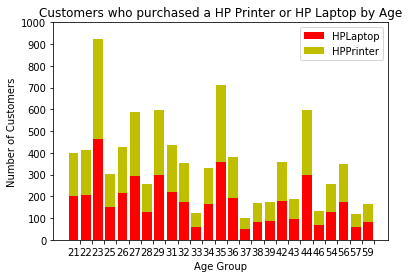

In [44]:
ind2 = np.arange(len(HP_printerOrLaptopTrans_noWDexternalHD_trans))
width = .5

hpLaptop_cust = HP_printerOrLaptopTrans_noWDexternalHD_trans['HPLaptop_cust_ct']
hpPrinter_cust = HP_printerOrLaptopTrans_noWDexternalHD_trans['HPPrinter_cust_ct']
customerAge = HP_printerOrLaptopTrans_noWDexternalHD_trans['customerAge'].astype(int)

plt.bar(ind2, hpLaptop_cust, color = 'r')
plt.bar(ind2, hpPrinter_cust, bottom=hpPrinter_cust, color = 'y')
plt.xticks(np.arange(len(customerAge)) + width, tuple(customerAge), horizontalalignment='right')
plt.yticks(np.arange(0, 1100, 100))
plt.title('Customers who purchased a HP Printer or HP Laptop by Age')
plt.ylabel('Number of Customers')
plt.xlabel('Age Group')
plt.legend((p1[0], p2[0]), ('HPLaptop', 'HPPrinter'))